# Linear Algebra in Python

This is a Jupyter notebook that takes you through basic linear algebra in Python.

## Loading packages

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

## Vector and their products

Lets define some vectors

In [16]:
x = [2, 9, 4, 2, -4]
y = [8, 5, -4, 1, -2]

Inner product of two vector is a scalar

In [17]:
np.inner(x,y)

55

Cross product

In [23]:
np.cross(x[0:3],y[0:3])

array([-56,  40, -62])

In [20]:
np.outer(x,y)

array([[ 16,  10,  -8,   2,  -4],
       [ 72,  45, -36,   9, -18],
       [ 32,  20, -16,   4,  -8],
       [ 16,  10,  -8,   2,  -4],
       [-32, -20,  16,  -4,   8]])

## Simple Statistics

Anomalies from the mean

In [25]:
xanom = x - np.mean(x)
xanom

array([-0.6,  6.4,  1.4, -0.6, -6.6])

Variance of x

In [33]:
np.inner(xanom,xanom) / (len(x)-1)

21.8

Calculated another way, but with one important difference to note: default python definition of stdev as  “population standard deviation” where numerator (degrees of freedom) is N, not N-1, which corresponds to a sample standard deviation

In [35]:
np.std(x,ddof=1)**2

21.8

Covariance can be calculated in a similar way

In [36]:
yanom = y - np.mean(y)
np.inner(xanom,yanom) / (len(x)-1)

8.55

## Matrix algebra

Solving various version of the Ax=b problem which solves a linear system of equations

In [39]:
A = np.array([[1,-1],[1,1]])
b = np.array([0,2]).T

Using inverse to calculate

In [43]:
np.matmul(np.linalg.inv(A),b)

array([1., 1.])

Now for a least-squares problem

In [45]:
A = np.array([[1,-3,4,5,9],[2,6,-3,4,8],[-1,0,-8,3,5]])
b = np.array([3,5,2]).T

In [46]:
np.matmul(np.linalg.pinv(A),b)

array([ 0.1091305 ,  0.26073263, -0.00331368,  0.15598932,  0.32293062])

## Calculating a linear regression with real data

Load in and plot Atlanta monthly mean temperature data using pandas and matplotlib

In [52]:
df=pd.read_csv("ATL_MonMeanTemp_1879_2020.csv")
df

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5
1,1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1
2,1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6
3,1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4
4,1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2016,42.4,48.5,60.5,64.1,71.1,81.0,83.4,82.7,78.8,69.6,58.9,48.9
138,2017,52.0,56.1,57.7,67.8,71.1,76.6,81.2,79.2,73.8,65.7,56.2,46.8
139,2018,40.4,57.3,53.5,59.8,74.8,79.8,80.8,79.7,81.0,67.4,50.3,48.6
140,2019,45.9,53.8,55.4,65.3,76.4,77.7,82.2,82.5,82.4,68.4,52.5,51.2


In [65]:
atl=df.to_numpy()
year = atl[0:,0]
augtemp = atl[0:,8]

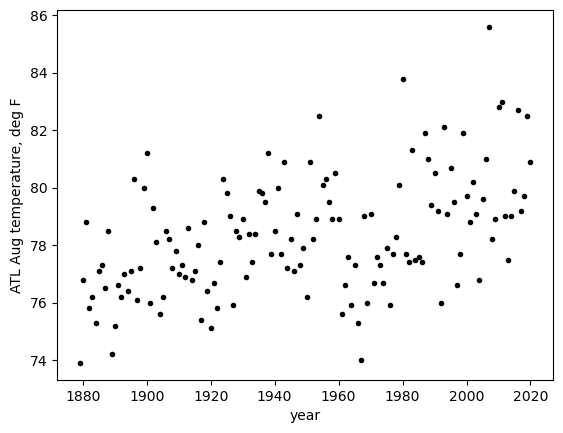

In [66]:
plt.plot(year,augtemp,'k.')
plt.xlabel('year')
plt.ylabel('ATL Aug temperature, deg F')
plt.show()

Setup matrices for linear regression

In [67]:
A = np.zeros((len(year),2))
A[0:,0] = year
A[0:,1] = 1
A

array([[1.879e+03, 1.000e+00],
       [1.880e+03, 1.000e+00],
       [1.881e+03, 1.000e+00],
       [1.882e+03, 1.000e+00],
       [1.883e+03, 1.000e+00],
       [1.884e+03, 1.000e+00],
       [1.885e+03, 1.000e+00],
       [1.886e+03, 1.000e+00],
       [1.887e+03, 1.000e+00],
       [1.888e+03, 1.000e+00],
       [1.889e+03, 1.000e+00],
       [1.890e+03, 1.000e+00],
       [1.891e+03, 1.000e+00],
       [1.892e+03, 1.000e+00],
       [1.893e+03, 1.000e+00],
       [1.894e+03, 1.000e+00],
       [1.895e+03, 1.000e+00],
       [1.896e+03, 1.000e+00],
       [1.897e+03, 1.000e+00],
       [1.898e+03, 1.000e+00],
       [1.899e+03, 1.000e+00],
       [1.900e+03, 1.000e+00],
       [1.901e+03, 1.000e+00],
       [1.902e+03, 1.000e+00],
       [1.903e+03, 1.000e+00],
       [1.904e+03, 1.000e+00],
       [1.905e+03, 1.000e+00],
       [1.906e+03, 1.000e+00],
       [1.907e+03, 1.000e+00],
       [1.908e+03, 1.000e+00],
       [1.909e+03, 1.000e+00],
       [1.910e+03, 1.000e+00],
       [

In [68]:
linfit = np.matmul(np.linalg.pinv(A),augtemp)
linfit

array([2.39250112e-02, 3.16934020e+01])

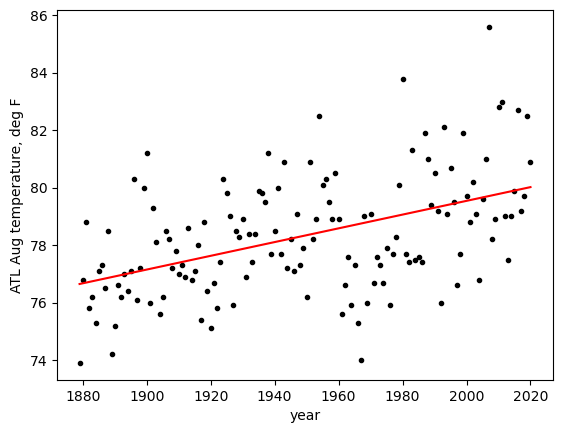

In [69]:
plt.plot(year,augtemp,'k.')
plt.plot(year,linfit[1]+linfit[0]*year,'r-')
plt.xlabel('year')
plt.ylabel('ATL Aug temperature, deg F')
plt.show()